# **Forest fires dataset**

In [16]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge,BayesianRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Вчитување на dataset**

In [17]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/forestfires.csv')
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


**Мапирање на имињата на месеците и деновите во цели броеви**

In [18]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

**Визуелизација**

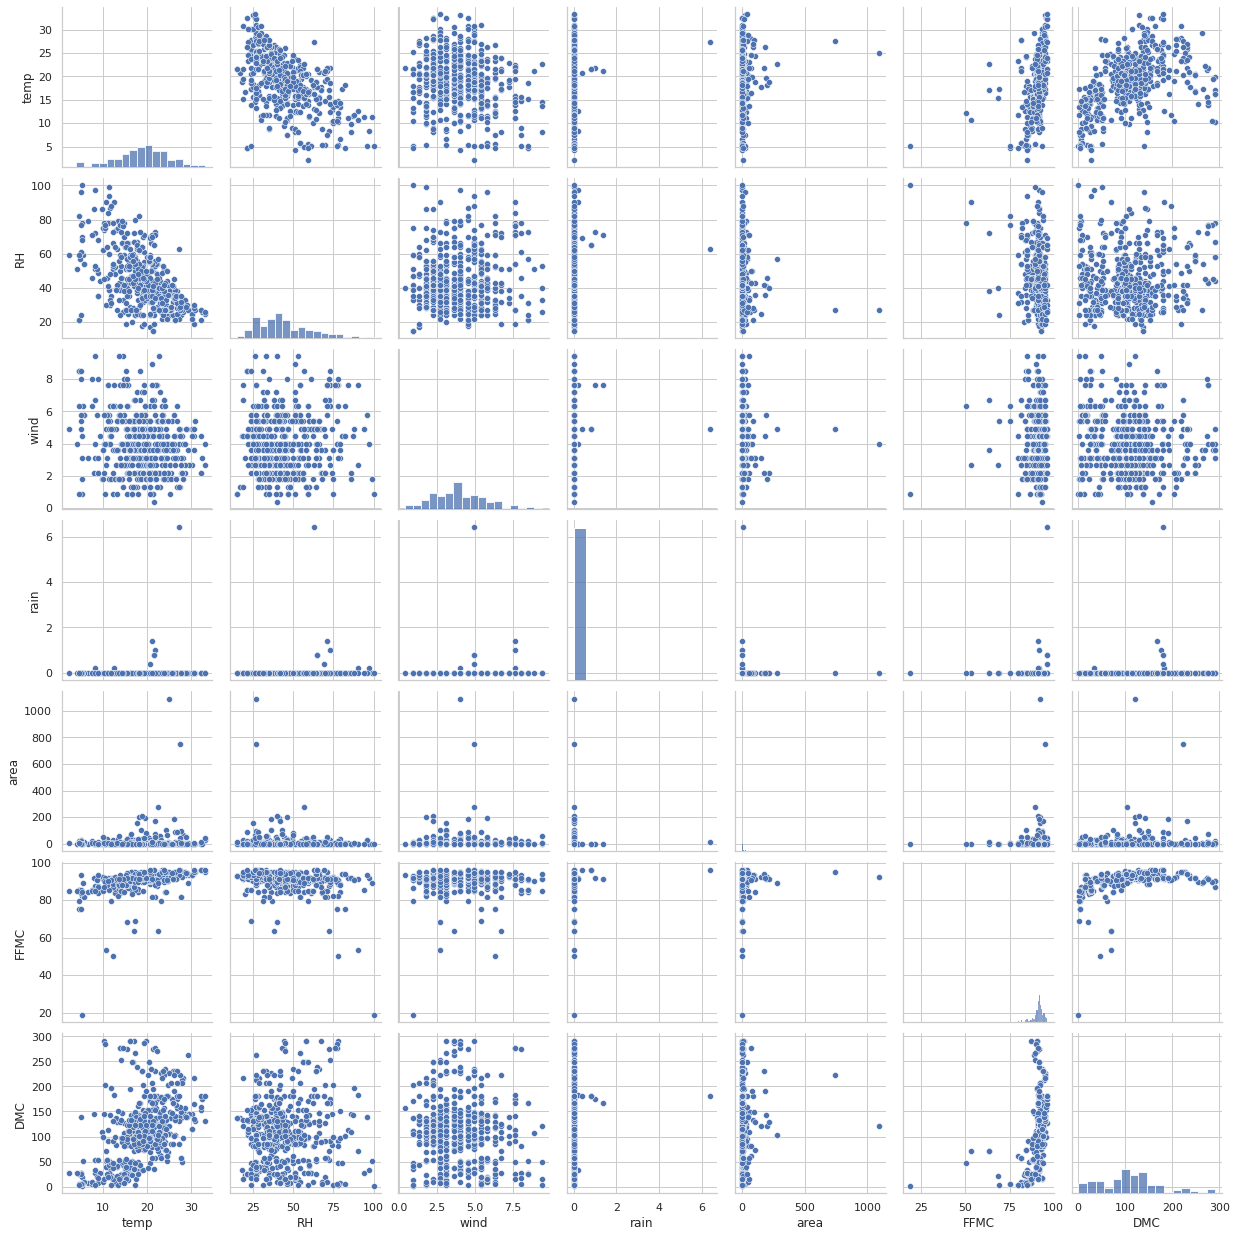

In [19]:
sns.set(style='whitegrid', context='notebook')
cols = ['temp', 'RH', 'wind', 'rain','area','FFMC','DMC']
sns.pairplot(data[cols], size=2.5);
plt.show()

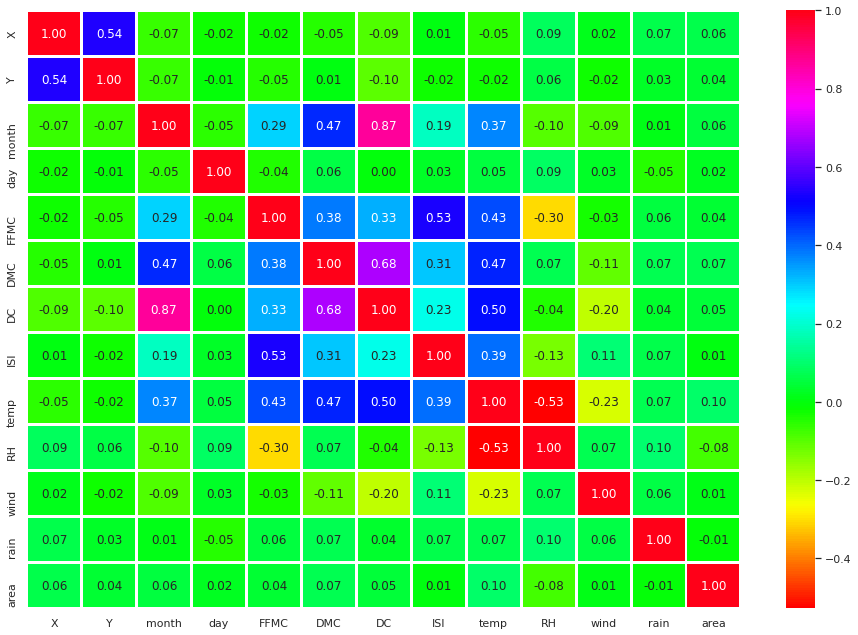

In [20]:
plt.figure(figsize=(16,11))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

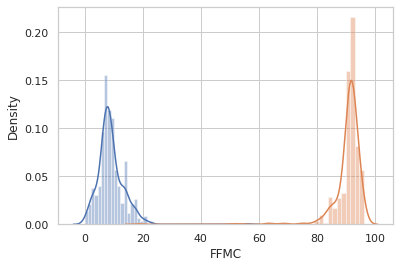

In [21]:
sns.distplot(data['ISI'])
sns.distplot(data['FFMC']);

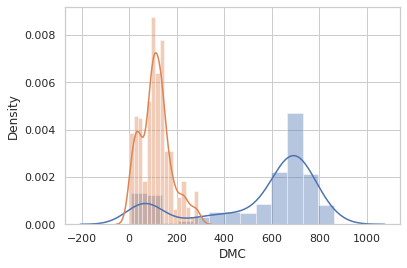

In [22]:
sns.distplot(data['DC'])
sns.distplot(data['DMC']);

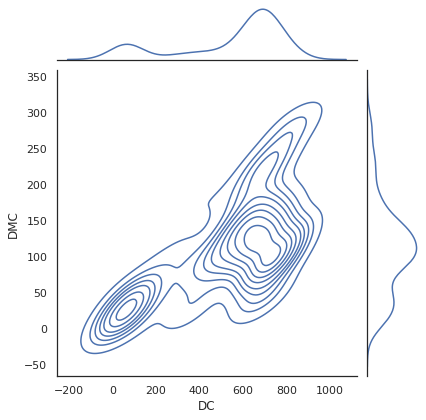

In [23]:
with sns.axes_style('white'):
    sns.jointplot("DC", "DMC", data, kind='kde');

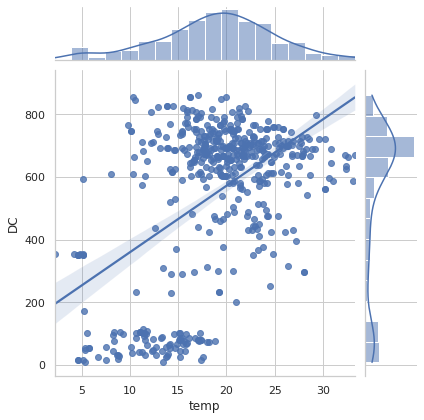

In [24]:
sns.jointplot("temp", "DC", data=data, kind='reg');

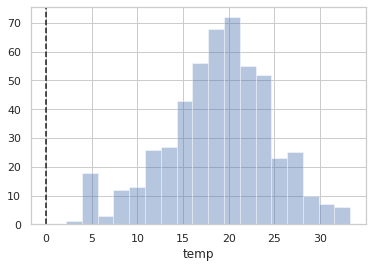

In [25]:
sns.distplot(data['temp'], kde=False);
plt.axvline(0, color="k", linestyle="--");

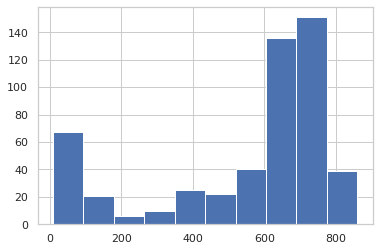

In [26]:
data['DC'].hist();

**Претпроцесирање на податоците**

In [27]:
X=data[data.columns[:-1]]
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [28]:
y=data['area']
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [29]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

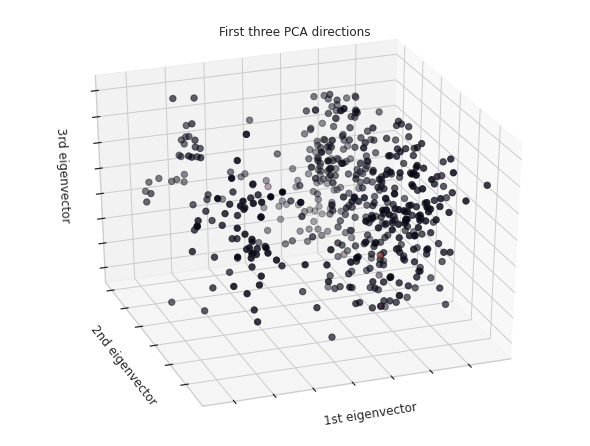

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3) 
X_reduced = pca.fit(X).transform(X) 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

***Regression models***








**Linear regression**

Coefficients W
[ 20.39424545  -3.04351461  20.04842917  -2.45609193 -12.05133527
  39.09102076 -25.35944442 -15.62596389  19.54525247 -12.73668735
   6.82912587 -21.17005676]
Intercept W0
-0.9648988982234545
MSE
7924.8845134700205


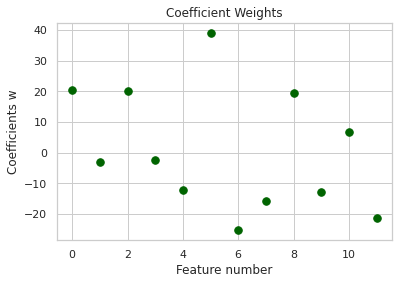

In [31]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("MSE")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

**Ridge regression**

Coefficients W
[16.08107157  2.12674838  2.6284557  -1.66966315 -0.92701963 20.99008804
 -4.5751652  -1.82154684 12.46725298 -9.54260548  5.40239549 -3.23652081]
Intercept W0
-6.384162515161188
MSE
7928.786988955347


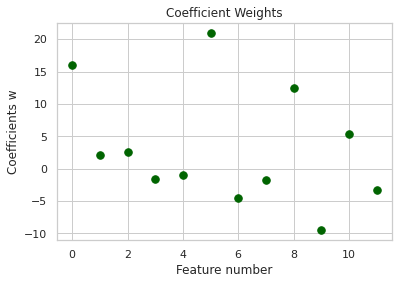

In [32]:
reg = Ridge(alpha=5).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("MSE")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()


**Lasso regression**

Coefficients W
[ 6.27093193  0.          0.         -0.          0.          6.60991339
  0.          0.          0.         -0.          0.         -0.        ]
Intercept W0
6.475477914053562
MSE
7963.431759308199


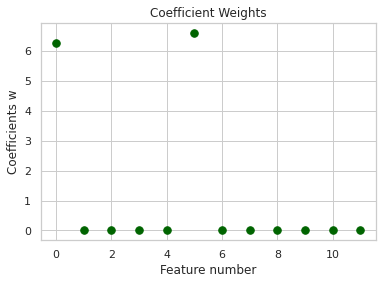

In [33]:
reg = Lasso(alpha=1).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("MSE")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

**Bayesian Ridge regression**

Coefficients W
[ 8.36111022  2.64975034  1.28412409 -0.86465081  0.74928749  7.83167311
  1.52274131  0.5121396   5.6860637  -3.74819927  1.84348403 -0.36422754]
Intercept W0
-0.33651564441523796
MSE
7934.17263333692


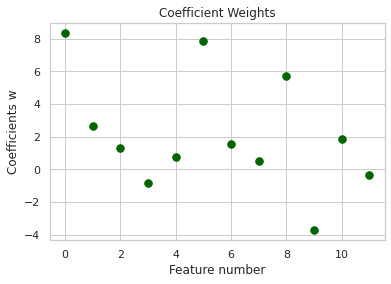

In [34]:
reg = BayesianRidge().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred, variance = reg.predict(X_test, return_std=True)
print("MSE")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# **Letter Recognition dataset**

**Вчитување на dataset**

In [35]:

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/letter-recognition.csv')
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [36]:
koloni=df.columns
koloni

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [37]:
array = df.values

**Визуелизација**

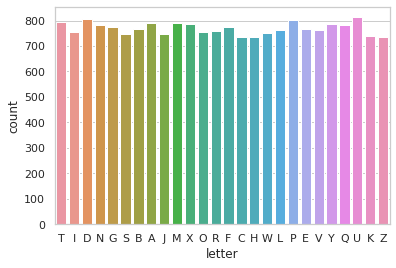

In [38]:
sns.countplot(df['letter'])

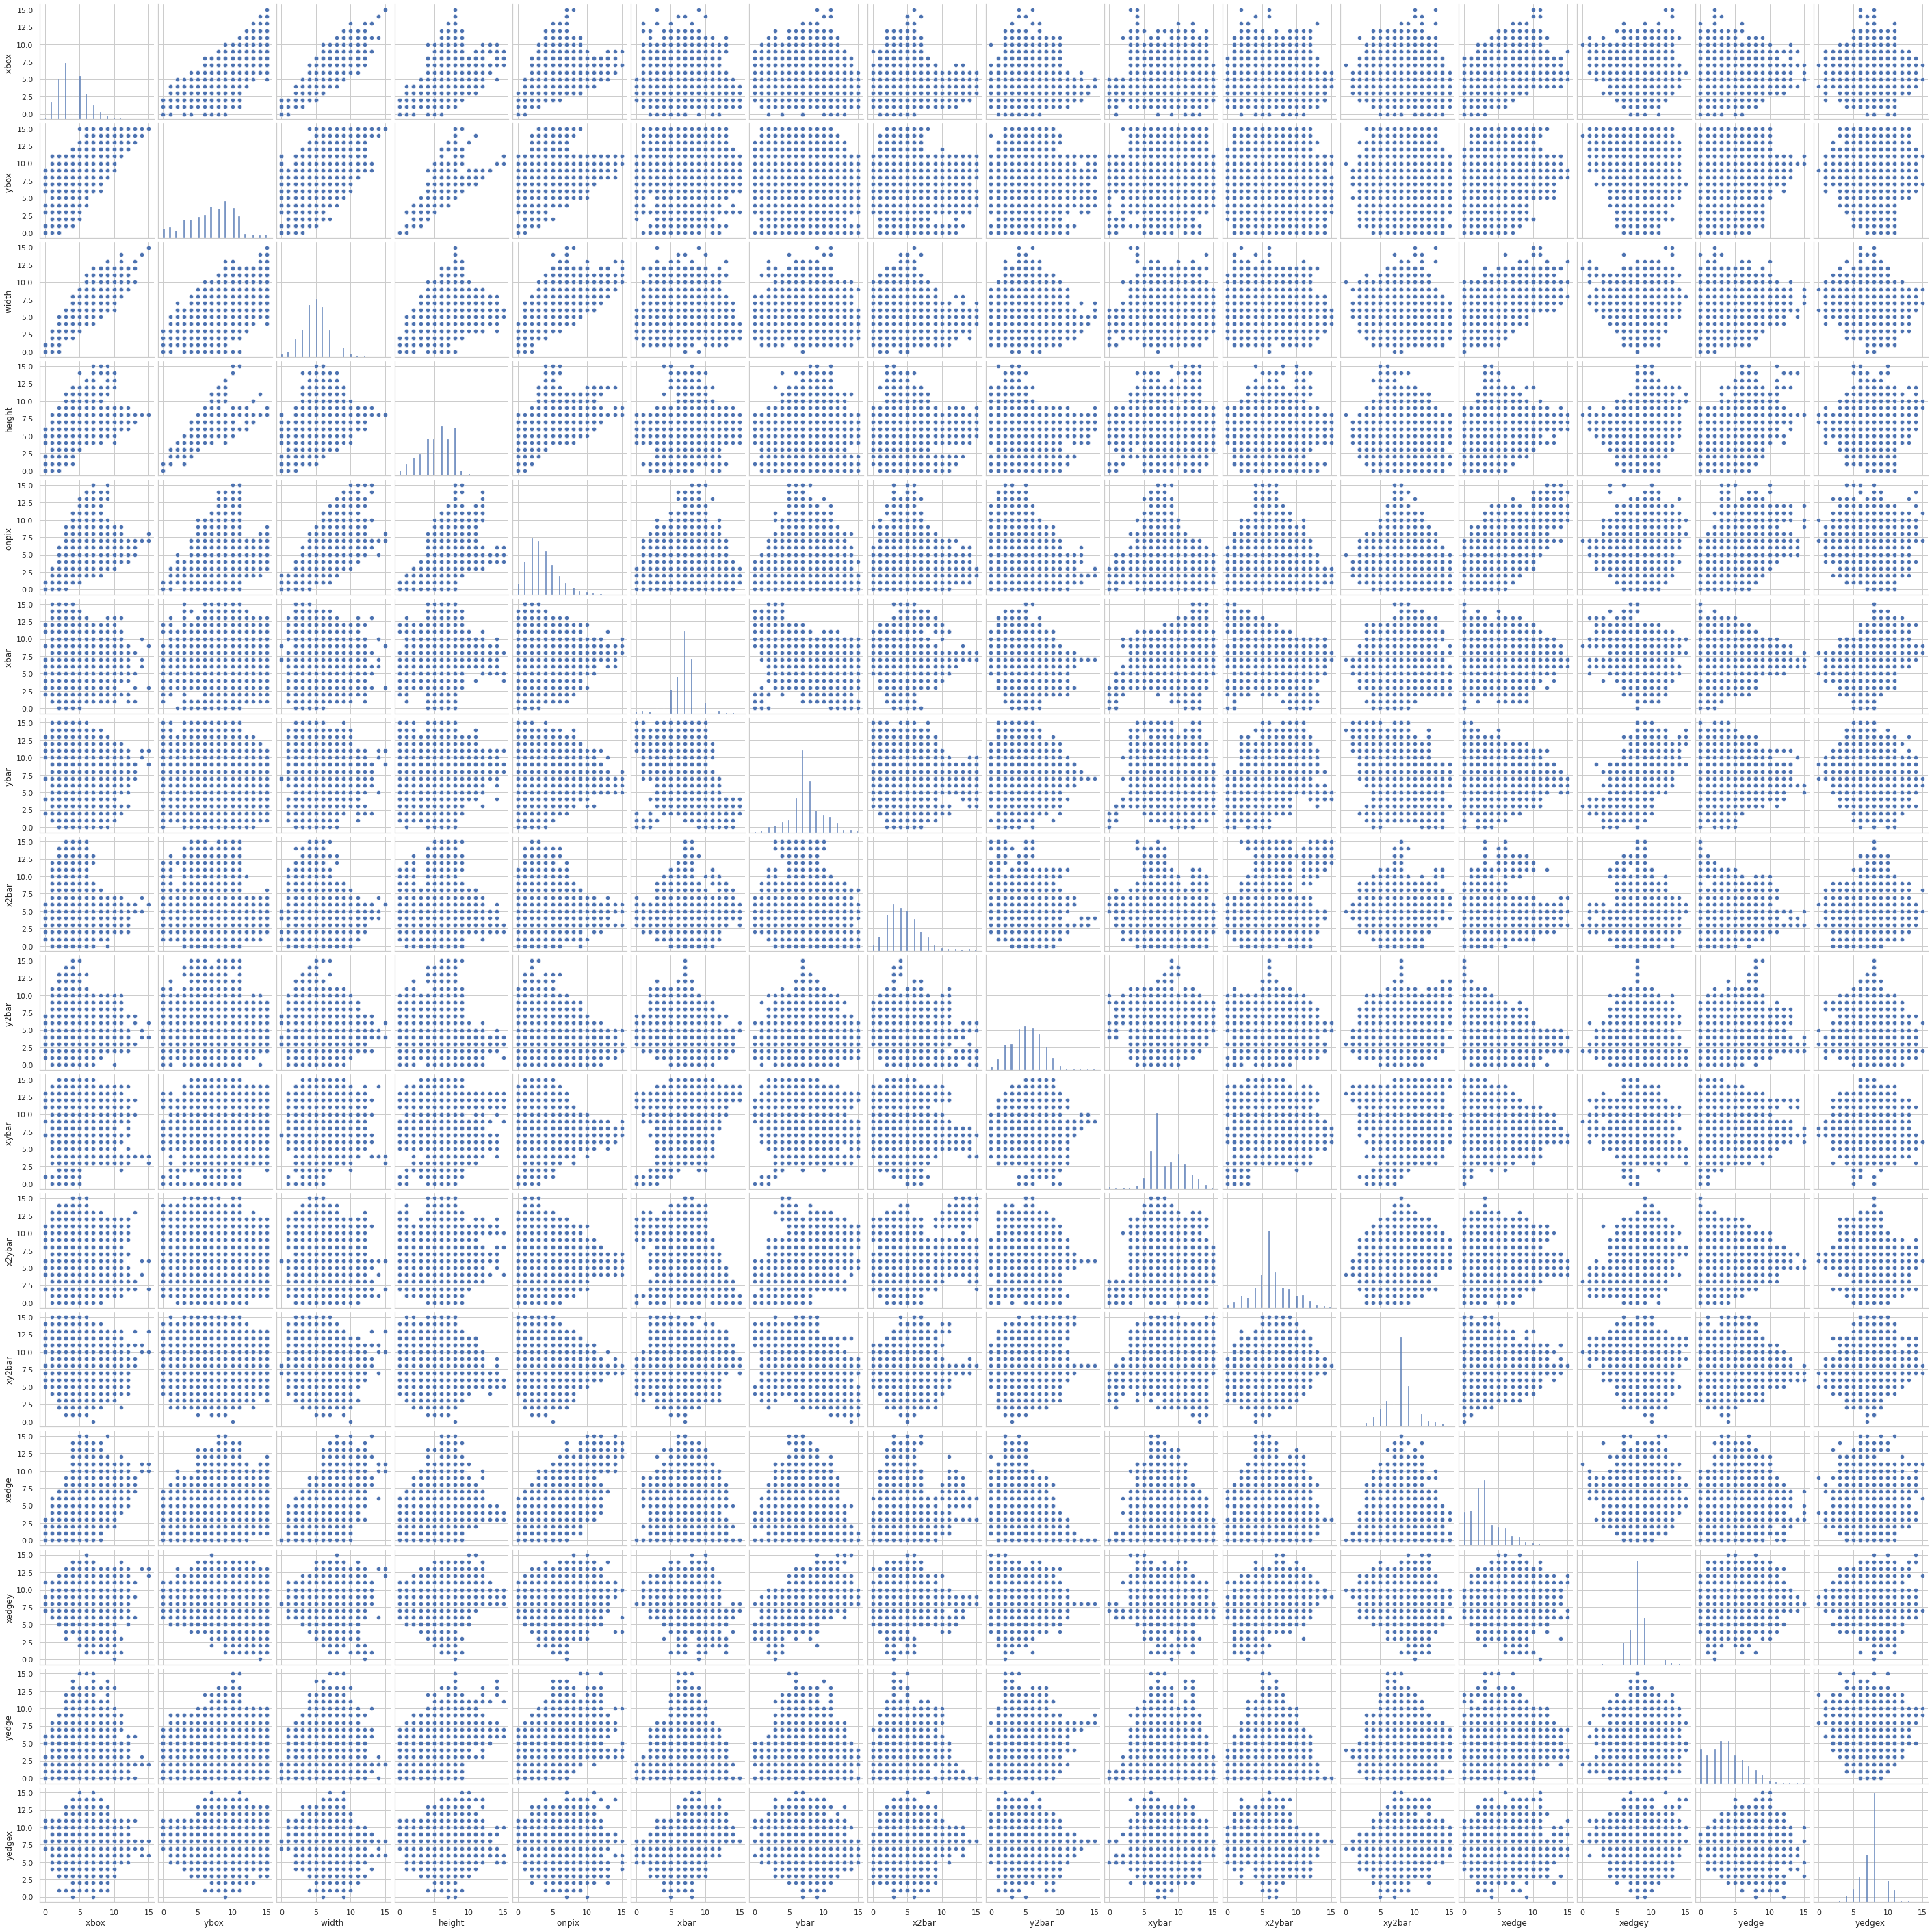

In [39]:
sns.set(style='whitegrid', context='notebook')
cols = df.columns
sns.pairplot(df[cols], size=2.5);
plt.show()

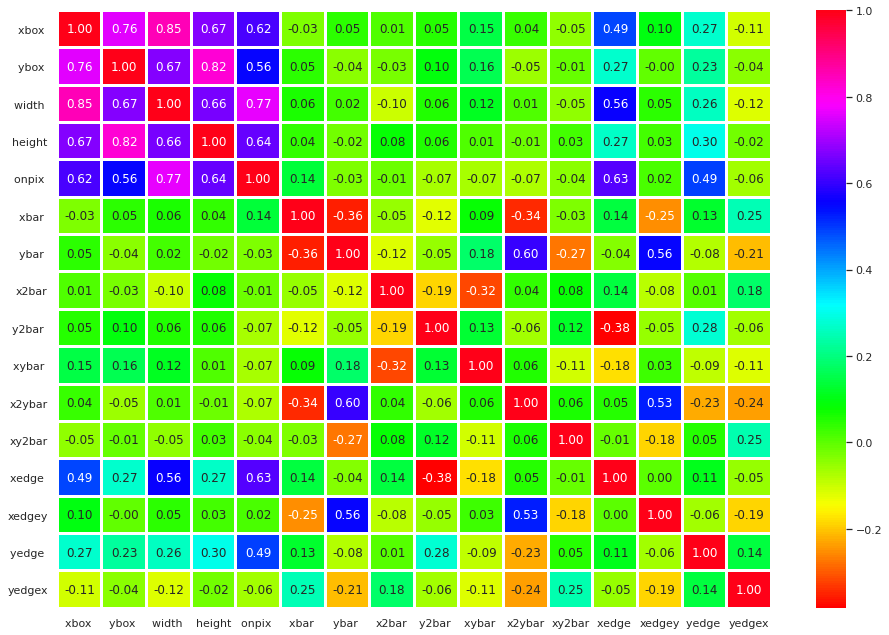

In [40]:
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

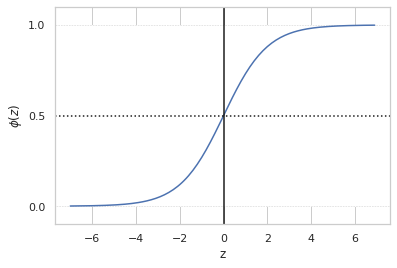

In [41]:

def sigmoid(z):
     return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

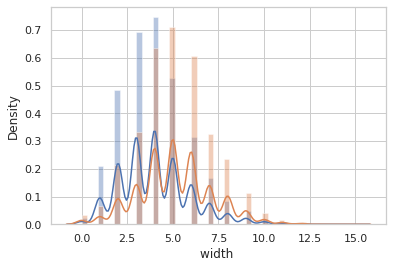

In [42]:
sns.distplot(df['xbox '])
sns.distplot(df['width ']);

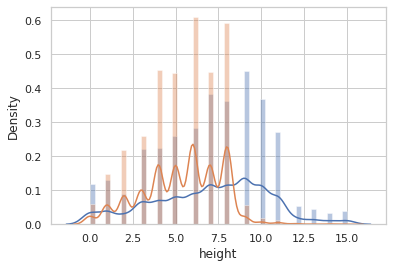

In [43]:
sns.distplot(df['ybox '])
sns.distplot(df['height']);

**Претпроцесирање на податоците**

In [44]:
X = array[:, 1:17]
Y = array[:, 0]


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

***Classification models***

**Gaussian Naive Bayes**

In [46]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, Y_train)
gaussianNB.score(X_test, Y_test)
predictions = gaussianNB.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, digits=2))


Accuracy:  0.6431666666666667
              precision    recall  f1-score   support

           A       0.85      0.92      0.88       232
           B       0.52      0.68      0.59       229
           C       0.71      0.72      0.71       201
           D       0.62      0.77      0.69       250
           E       0.62      0.35      0.45       238
           F       0.67      0.72      0.69       211
           G       0.51      0.55      0.53       230
           H       0.52      0.31      0.39       218
           I       0.51      0.74      0.61       221
           J       0.82      0.71      0.76       228
           K       0.43      0.47      0.45       188
           L       0.97      0.76      0.85       231
           M       0.68      0.90      0.77       252
           N       0.88      0.67      0.76       231
           O       0.52      0.71      0.60       218
           P       0.88      0.73      0.80       248
           Q       0.64      0.53      0.58       2

**KNN**

Text(0, 0.5, 'Error Rate')

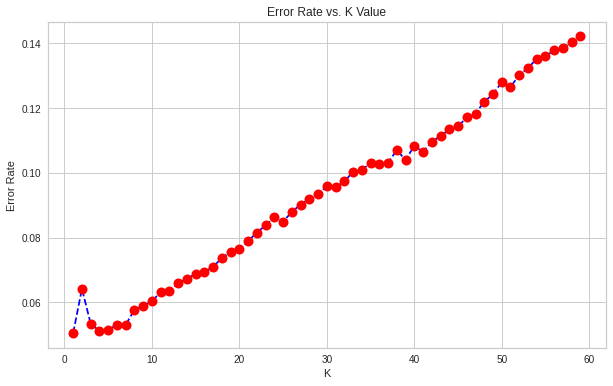

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)
predictions = knn.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, digits=2))


Accuracy:  0.9558333333333333
              precision    recall  f1-score   support

           A       0.98      1.00      0.99       232
           B       0.91      0.95      0.93       229
           C       0.97      0.94      0.96       201
           D       0.93      0.96      0.95       250
           E       0.98      0.96      0.97       238
           F       0.93      0.95      0.94       211
           G       0.96      0.96      0.96       230
           H       0.92      0.84      0.88       218
           I       0.96      0.95      0.96       221
           J       0.96      0.94      0.95       228
           K       0.88      0.93      0.90       188
           L       0.97      0.97      0.97       231
           M       0.99      0.98      0.99       252
           N       0.98      0.93      0.95       231
           O       0.89      0.97      0.93       218
           P       0.97      0.93      0.95       248
           Q       0.96      0.95      0.95       2

**Support Vector Machines – SVC**

In [49]:
svc = SVC(kernel='rbf', gamma='auto', C=6)
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)
predictions = svc.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, digits=2))


Accuracy:  0.9765
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       232
           B       0.95      0.98      0.96       229
           C       0.99      0.96      0.97       201
           D       0.96      0.99      0.98       250
           E       0.97      0.97      0.97       238
           F       0.96      0.98      0.97       211
           G       0.97      0.96      0.97       230
           H       0.95      0.91      0.93       218
           I       0.99      0.94      0.96       221
           J       0.94      0.97      0.96       228
           K       0.95      0.96      0.96       188
           L       0.99      0.98      0.98       231
           M       1.00      1.00      1.00       252
           N       0.99      0.96      0.97       231
           O       0.98      0.98      0.98       218
           P       0.99      0.97      0.98       248
           Q       0.99      0.98      0.98       253
         

**Logistic Regression**

In [50]:
log = LogisticRegression()
log.fit(X_train, Y_train)
log.score(X_test, Y_test)
predictions = log.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions, digits=2))

Accuracy:  0.7626666666666667
              precision    recall  f1-score   support

           A       0.85      0.90      0.88       232
           B       0.63      0.74      0.68       229
           C       0.75      0.68      0.71       201
           D       0.76      0.78      0.77       250
           E       0.71      0.74      0.72       238
           F       0.76      0.77      0.77       211
           G       0.58      0.53      0.55       230
           H       0.54      0.40      0.46       218
           I       0.87      0.81      0.84       221
           J       0.79      0.81      0.80       228
           K       0.62      0.69      0.65       188
           L       0.85      0.81      0.83       231
           M       0.90      0.89      0.89       252
           N       0.81      0.81      0.81       231
           O       0.66      0.72      0.69       218
           P       0.88      0.77      0.82       248
           Q       0.74      0.70      0.72       2